In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fuel_df = pd.read_csv('FuelConsumption.csv')
pd.set_option('display.max_columns', None)
fuel_df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Visualizing data

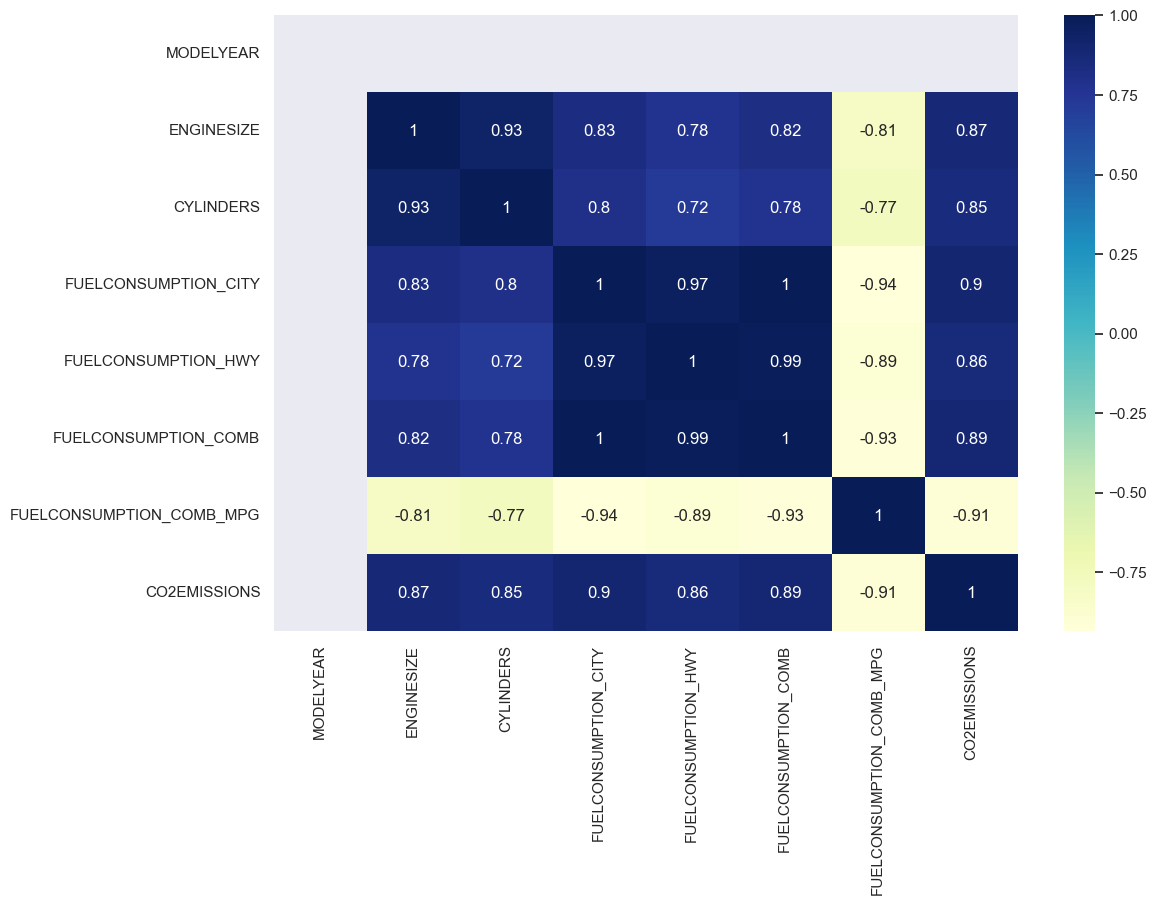

In [3]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(fuel_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [4]:
fuel_df.drop(columns=['FUELCONSUMPTION_COMB_MPG','MODELYEAR'], axis=1, inplace=True)

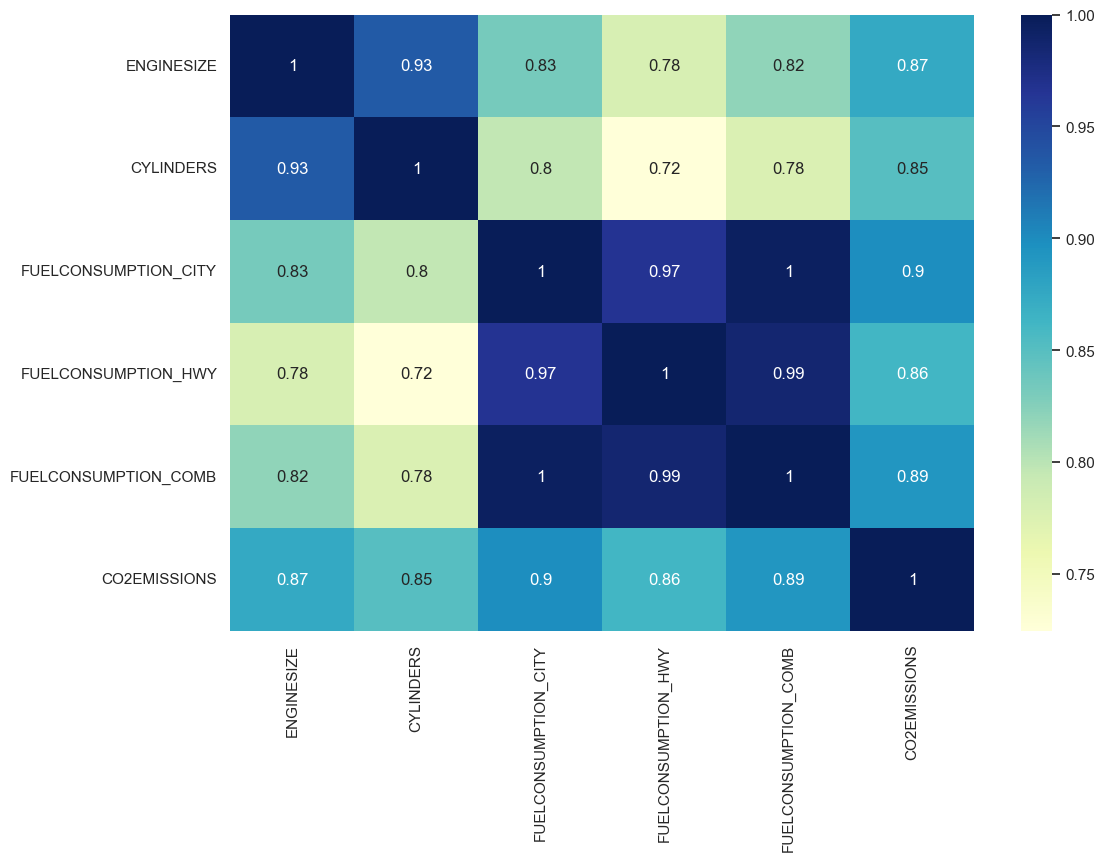

In [5]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(fuel_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

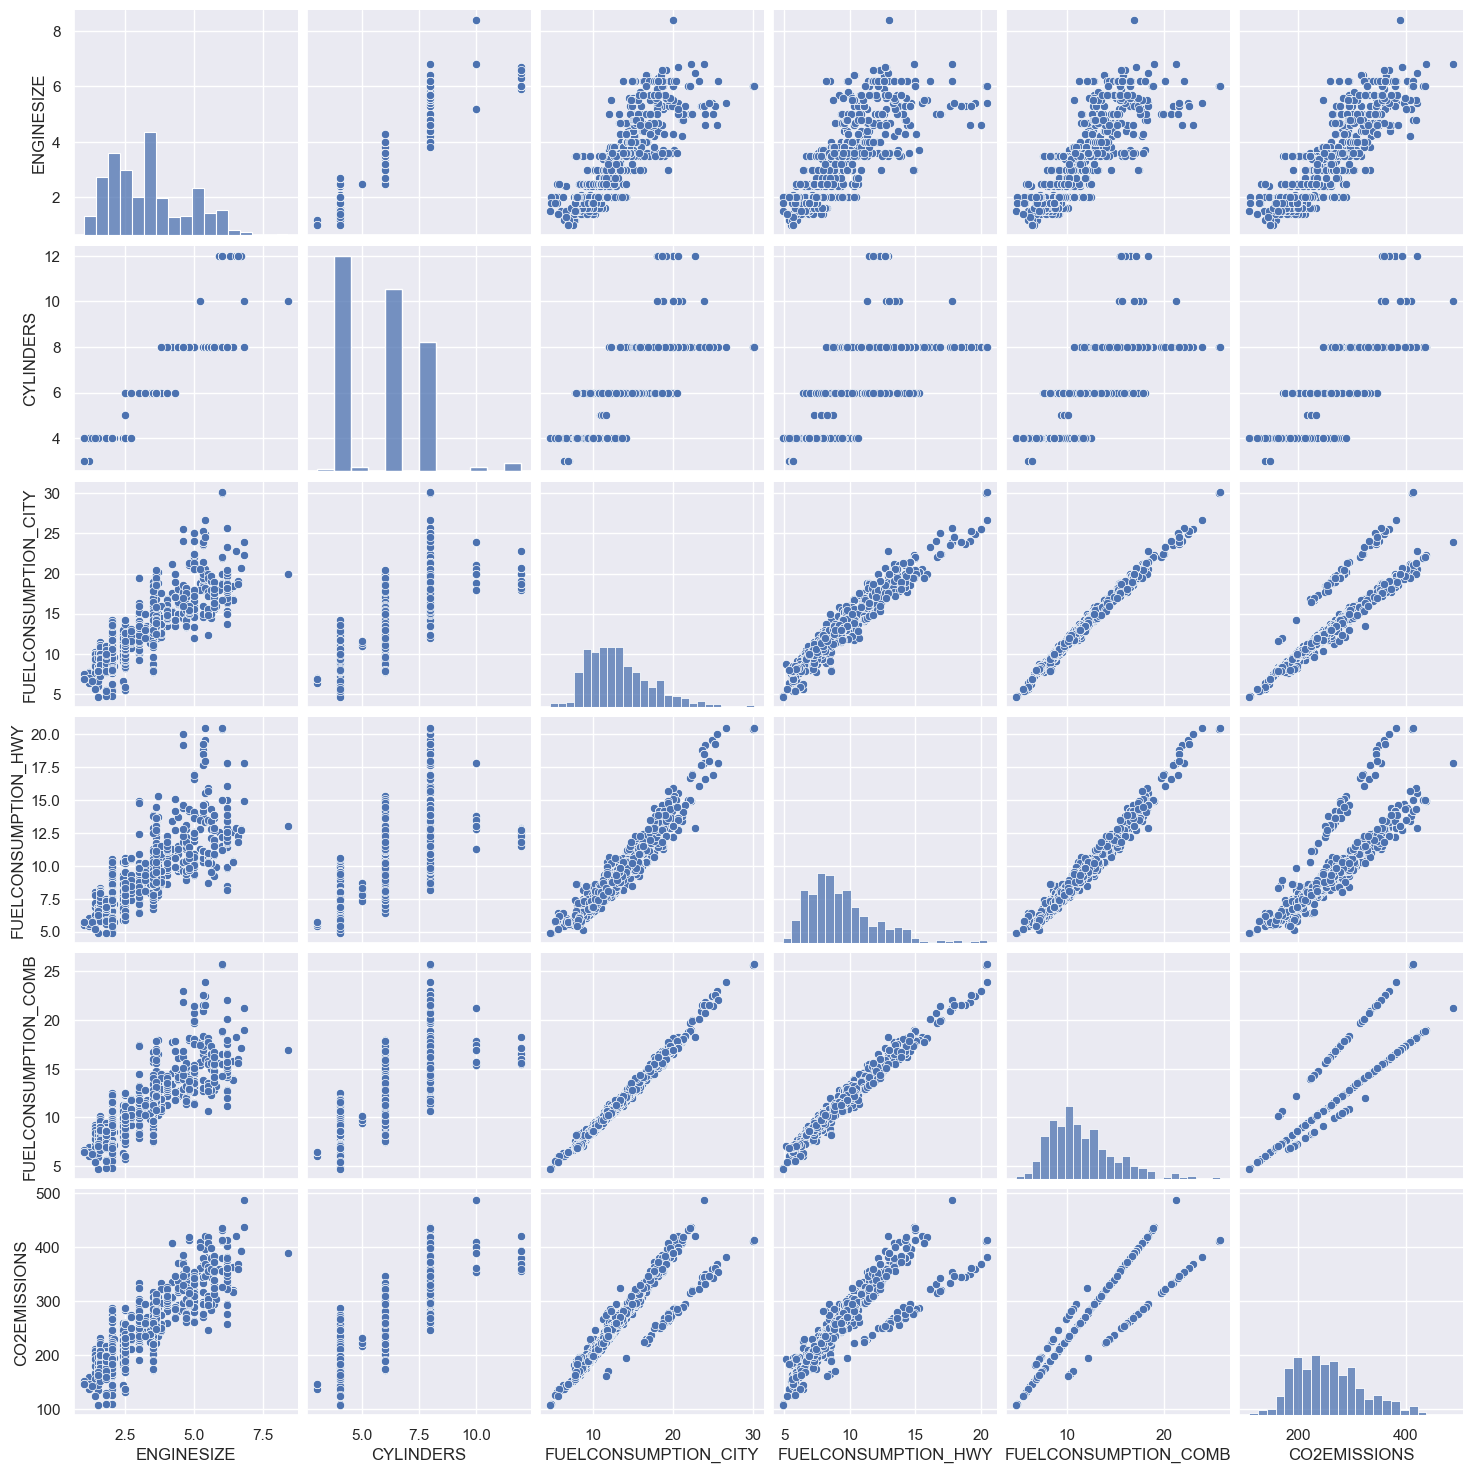

In [6]:
sns.pairplot(fuel_df)

In [7]:
fuel_df.dtypes

MAKE                     object
MODEL                    object
VEHICLECLASS             object
ENGINESIZE              float64
CYLINDERS                 int64
TRANSMISSION             object
FUELTYPE                 object
FUELCONSUMPTION_CITY    float64
FUELCONSUMPTION_HWY     float64
FUELCONSUMPTION_COMB    float64
CO2EMISSIONS              int64
dtype: object

In [8]:
fuel_df.isnull().sum()

MAKE                    0
MODEL                   0
VEHICLECLASS            0
ENGINESIZE              0
CYLINDERS               0
TRANSMISSION            0
FUELTYPE                0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [9]:
fuel_df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


# Data Preparation

In [10]:
for i in fuel_df.select_dtypes(include='object').columns.to_list():
    print ("Number of unique values in ---> {} column are ---> {} \n\n The unique values are {}".format(i, len(fuel_df[i].unique()),fuel_df[i].unique()))
    print ("----------------------------------------------------------------------------------------------------------------------------- \n")

Number of unique values in ---> MAKE column are ---> 39 

 The unique values are ['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
----------------------------------------------------------------------------------------------------------------------------- 

Number of unique values in ---> MODEL column are ---> 663 

 The unique values are ['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATT

In [11]:
fuel_df.drop(columns=['MODEL'], axis=1, inplace=True)

# Dividing the data into categorical and numerical features 

In [12]:
categorical_features = fuel_df.select_dtypes(include='object').columns.to_list()
numerical_features = fuel_df.select_dtypes(include=['int','float']).columns.to_list()

In [13]:
fuel_df= pd.get_dummies(fuel_df,categorical_features,drop_first=True)
fuel_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,MAKE_LAMBORGHINI,MAKE_LAND ROVER,MAKE_LEXUS,MAKE_LINCOLN,MAKE_MASERATI,MAKE_MAZDA,MAKE_MERCEDES-BENZ,MAKE_MINI,MAKE_MITSUBISHI,MAKE_NISSAN,MAKE_PORSCHE,MAKE_RAM,MAKE_ROLLS-ROYCE,MAKE_SCION,MAKE_SMART,MAKE_SRT,MAKE_SUBARU,MAKE_TOYOTA,MAKE_VOLKSWAGEN,MAKE_VOLVO,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1.5,4,6.0,5.8,5.9,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1063,3.2,6,13.2,9.5,11.5,264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1064,3.0,6,13.4,9.8,11.8,271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1065,3.2,6,12.9,9.3,11.3,260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# Splitting the data into training and testing data 

In [14]:
df_train, df_test = train_test_split(fuel_df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling our numerical features

In [15]:
scaler = MinMaxScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

df_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,MAKE_LAMBORGHINI,MAKE_LAND ROVER,MAKE_LEXUS,MAKE_LINCOLN,MAKE_MASERATI,MAKE_MAZDA,MAKE_MERCEDES-BENZ,MAKE_MINI,MAKE_MITSUBISHI,MAKE_NISSAN,MAKE_PORSCHE,MAKE_RAM,MAKE_ROLLS-ROYCE,MAKE_SCION,MAKE_SMART,MAKE_SRT,MAKE_SUBARU,MAKE_TOYOTA,MAKE_VOLKSWAGEN,MAKE_VOLVO,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,0.270270,0.333333,0.305882,0.237179,0.280952,0.359788,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1044,0.108108,0.111111,0.207843,0.128205,0.180952,0.232804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
590,0.135135,0.111111,0.215686,0.185897,0.204762,0.261905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
330,0.351351,0.333333,0.372549,0.288462,0.342857,0.439153,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
345,0.594595,0.555556,0.572549,0.628205,0.590476,0.756614,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Dividing into X and Y sets for the model building

In [16]:
y_train = df_train.pop('FUELCONSUMPTION_COMB')
X_train = df_train

In [17]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,MAKE_LAMBORGHINI,MAKE_LAND ROVER,MAKE_LEXUS,MAKE_LINCOLN,MAKE_MASERATI,MAKE_MAZDA,MAKE_MERCEDES-BENZ,MAKE_MINI,MAKE_MITSUBISHI,MAKE_NISSAN,MAKE_PORSCHE,MAKE_RAM,MAKE_ROLLS-ROYCE,MAKE_SCION,MAKE_SMART,MAKE_SRT,MAKE_SUBARU,MAKE_TOYOTA,MAKE_VOLKSWAGEN,MAKE_VOLVO,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,0.270270,0.333333,0.305882,0.237179,0.359788,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1044,0.108108,0.111111,0.207843,0.128205,0.232804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
590,0.135135,0.111111,0.215686,0.185897,0.261905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
330,0.351351,0.333333,0.372549,0.288462,0.439153,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
345,0.594595,0.555556,0.572549,0.628205,0.756614,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.081081,0.111111,0.180392,0.134615,0.214286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
53,0.432432,0.555556,0.411765,0.410256,0.523810,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
350,0.594595,0.555556,0.623529,0.679487,0.822751,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79,0.135135,0.111111,0.113725,0.038462,0.187831,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Building our model

## 1. RFE

In [18]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
# lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select =20,verbose=21)             # running RFE
rfe = rfe.fit(X_train, y_train)

names=X_train.columns.tolist()

b=rfe.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 fe

0                              CO2EMISSIONS
1                                 CYLINDERS
2                                ENGINESIZE
3                      FUELCONSUMPTION_CITY
4                       FUELCONSUMPTION_HWY
5                                FUELTYPE_E
6                             MAKE_CADILLAC
7                               MAKE_JAGUAR
8                           MAKE_LAND ROVER
9                              MAKE_LINCOLN
10                         MAKE_ROLLS-ROYCE
11                               MAKE_SMART
12                                 MAKE_SRT
13                          TRANSMISSION_A7
14                         TRANSMISSION_AM5
15                         TRANSMISSION_AM6
16                         TRANSMISSION_AS5
17                     VEHICLECLASS_MINIVAN
18    VEHICLECLASS_STATION WAGON - MID-SIZE
19             VEHICLECLASS_VAN - PASSENGER
Name: features, dtype: object

In [19]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('ENGINESIZE', True, 1),
 ('CYLINDERS', True, 1),
 ('FUELCONSUMPTION_CITY', True, 1),
 ('FUELCONSUMPTION_HWY', True, 1),
 ('CO2EMISSIONS', True, 1),
 ('MAKE_ASTON MARTIN', False, 25),
 ('MAKE_AUDI', False, 43),
 ('MAKE_BENTLEY', False, 44),
 ('MAKE_BMW', False, 54),
 ('MAKE_BUICK', False, 23),
 ('MAKE_CADILLAC', True, 1),
 ('MAKE_CHEVROLET', False, 33),
 ('MAKE_CHRYSLER', False, 11),
 ('MAKE_DODGE', False, 32),
 ('MAKE_FIAT', False, 41),
 ('MAKE_FORD', False, 31),
 ('MAKE_GMC', False, 26),
 ('MAKE_HONDA', False, 49),
 ('MAKE_HYUNDAI', False, 48),
 ('MAKE_INFINITI', False, 12),
 ('MAKE_JAGUAR', True, 1),
 ('MAKE_JEEP', False, 61),
 ('MAKE_KIA', False, 27),
 ('MAKE_LAMBORGHINI', False, 36),
 ('MAKE_LAND ROVER', True, 1),
 ('MAKE_LEXUS', False, 53),
 ('MAKE_LINCOLN', True, 1),
 ('MAKE_MASERATI', False, 46),
 ('MAKE_MAZDA', False, 10),
 ('MAKE_MERCEDES-BENZ', False, 17),
 ('MAKE_MINI', False, 19),
 ('MAKE_MITSUBISHI', False, 29),
 ('MAKE_NISSAN', False, 35),
 ('MAKE_PORSCHE', False, 24),


In [20]:
col = X_train.columns[rfe.support_]
col

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'CO2EMISSIONS', 'MAKE_CADILLAC', 'MAKE_JAGUAR',
       'MAKE_LAND ROVER', 'MAKE_LINCOLN', 'MAKE_ROLLS-ROYCE', 'MAKE_SMART',
       'MAKE_SRT', 'VEHICLECLASS_MINIVAN',
       'VEHICLECLASS_STATION WAGON - MID-SIZE', 'VEHICLECLASS_VAN - PASSENGER',
       'TRANSMISSION_A7', 'TRANSMISSION_AM5', 'TRANSMISSION_AM6',
       'TRANSMISSION_AS5', 'FUELTYPE_E'],
      dtype='object')

In [21]:
X_train.columns[~rfe.support_]

Index(['MAKE_ASTON MARTIN', 'MAKE_AUDI', 'MAKE_BENTLEY', 'MAKE_BMW',
       'MAKE_BUICK', 'MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DODGE',
       'MAKE_FIAT', 'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI',
       'MAKE_INFINITI', 'MAKE_JEEP', 'MAKE_KIA', 'MAKE_LAMBORGHINI',
       'MAKE_LEXUS', 'MAKE_MASERATI', 'MAKE_MAZDA', 'MAKE_MERCEDES-BENZ',
       'MAKE_MINI', 'MAKE_MITSUBISHI', 'MAKE_NISSAN', 'MAKE_PORSCHE',
       'MAKE_RAM', 'MAKE_SCION', 'MAKE_SUBARU', 'MAKE_TOYOTA',
       'MAKE_VOLKSWAGEN', 'MAKE_VOLVO', 'VEHICLECLASS_FULL-SIZE',
       'VEHICLECLASS_MID-SIZE', 'VEHICLECLASS_MINICOMPACT',
       'VEHICLECLASS_PICKUP TRUCK - SMALL',
       'VEHICLECLASS_PICKUP TRUCK - STANDARD',
       'VEHICLECLASS_SPECIAL PURPOSE VEHICLE',
       'VEHICLECLASS_STATION WAGON - SMALL', 'VEHICLECLASS_SUBCOMPACT',
       'VEHICLECLASS_SUV - SMALL', 'VEHICLECLASS_SUV - STANDARD',
       'VEHICLECLASS_TWO-SEATER', 'VEHICLECLASS_VAN - CARGO',
       'TRANSMISSION_A5', 'TRANSMISSION_A6', '

## 2. Building model using statsmodel, for the detailed statistics

In [22]:
X_train_rfe = X_train[col]




1. Import necessary libraries:
    - The code imports the pandas library and renames it as pd.
    - It also imports modules from the statsmodels library, including the main module as sm and a specific sub-module for calculating the variance inflation factor (VIF).
    
 
2. Define a function perform_multi_linear_regression that takes two input arguments: X_train and y_train.
    - This function is designed to perform a stepwise multiple linear regression.


3. Add a constant term to the independent variable matrix X_train using sm.add_constant. This is typically done to include an intercept term in the linear regression model.


4. Fit a multiple linear regression model using the sm.OLS (Ordinary Least Squares) method with the dependent variable y_train and the modified independent variable matrix X_train_rfe. Store the results in the lm variable.


5. Enter a loop that continues until certain conditions are met:
    - Calculate the maximum p-value from the coefficients of the model, excluding the constant term (denoted as 'const').
    - Check if the maximum p-value is greater than 0.05, indicating that at least one feature is not statistically significant.


6. If a feature's p-value is greater than 0.05:
    - Remove the feature with the highest p-value from X_train_rfe.
    - Re-add the constant term to the modified X_train_rfe.
    - Fit a new linear regression model with the updated set of features.
    - Repeat the process until no feature has a p-value greater than 0.05.


7. After all p-values are less than or equal to 0.05, enter another loop to address multicollinearity by calculating the Variance Inflation Factor (VIF) for each feature in X_train_rfe.
    - VIF is a measure of how much the variance of the estimated regression coefficients is increased due to multicollinearity.
    - Calculate the VIF for each feature and store the results in a DataFrame called vif.
    - Identify features with a VIF greater than 5 (an arbitrary threshold) and exclude the constant term.


8. If high VIF features are found:
    - Remove the feature with the highest VIF from X_train_rfe.
    - Fit a new linear regression model with the updated set of features.
    - Repeat this process until no feature has a VIF greater than 5.


9. Return the final set of selected features as X_train_rfe after the stepwise regression process.



#### *In short, the code performs a data-driven process to choose the most important independent variables (features) for a multiple linear regression model. It starts with a set of potential features, fits the model, and iteratively removes less important features with high p-values and high multicollinearity (correlation between features). The result is a refined set of features that significantly contribute to the model's predictive power, improving its accuracy and interpretability.*

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def perform_multi_linear_regression(X_train, y_train):
    X_train_rfe = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_rfe).fit()

    while True:
        max_pvalue = lm.pvalues.drop('const').max()
        if max_pvalue > 0.05:
            # Code to execute when p-value is greater than 0.05
            # For example, you can remove the feature with the highest p-value.
            remove_feature = lm.pvalues.drop('const').idxmax()
            X_train_rfe = X_train_rfe.drop(remove_feature, axis=1)
            X_train_rfe = sm.add_constant(X_train_rfe)
            lm = sm.OLS(y_train, X_train_rfe).fit()
            max_pvalue = lm.pvalues.drop('const').max()
            
            if max_pvalue <= 0.05:
                # Code to execute when p-value becomes less than or equal to 0.05
                while True:
                    vif = pd.DataFrame()
                    vif['Features'] = X_train_rfe.columns
                    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
                    vif['VIF'] = round(vif['VIF'], 2)
                    
                    high_vif_features = vif[vif['VIF'] > 5]
                    high_vif_features = high_vif_features[high_vif_features['Features'] != 'const']
                    if not high_vif_features.empty:
                        remove_feature = high_vif_features['Features'].iloc[0]
                        X_train_rfe = X_train_rfe.drop(remove_feature, axis=1)
                        lm = sm.OLS(y_train, X_train_rfe).fit()
                    else:
                        
                        break
        else:
            break

    return X_train_rfe

# Example usage:
# Assuming you have X_train and y_train as your training data
selected_features = perform_multi_linear_regression(X_train_rfe, y_train)


In [24]:
X_train_rfe = sm.add_constant(selected_features)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     FUELCONSUMPTION_COMB   R-squared:                       0.991
Model:                              OLS   Adj. R-squared:                  0.990
Method:                   Least Squares   F-statistic:                 1.938e+04
Date:                  Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                          19:38:17   Log-Likelihood:                 2009.6
No. Observations:                   746   AIC:                            -4009.
Df Residuals:                       741   BIC:                            -3986.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [25]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.70
1,CO2EMISSIONS,1.17
3,VEHICLECLASS_VAN - PASSENGER,1.15
4,FUELTYPE_E,1.05
2,MAKE_LAND ROVER,1.02


## 3. Residual Analysis of the train data

In [26]:
y_train_FUELCONSUMPTION_COMB = lm.predict(X_train_rfe)
res = (y_train - y_train_FUELCONSUMPTION_COMB)

Text(0.5, 0, 'Errors')

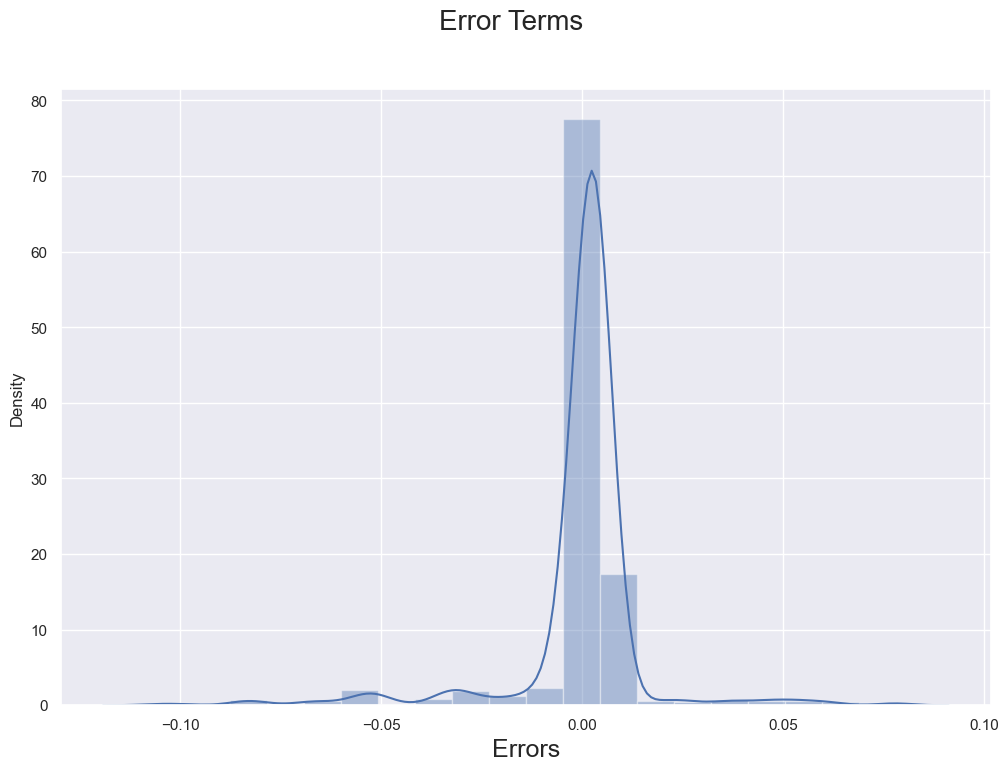

In [27]:
fig = plt.figure()
sns.distplot((y_train - y_train_FUELCONSUMPTION_COMB), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## 4. Looking for patterns in the residuals

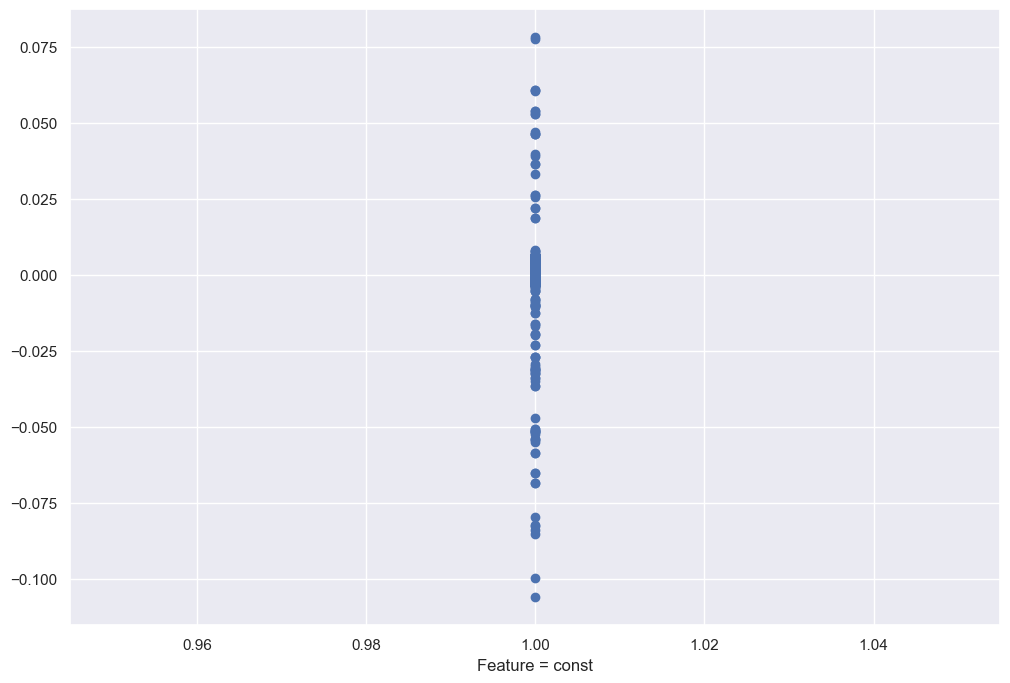

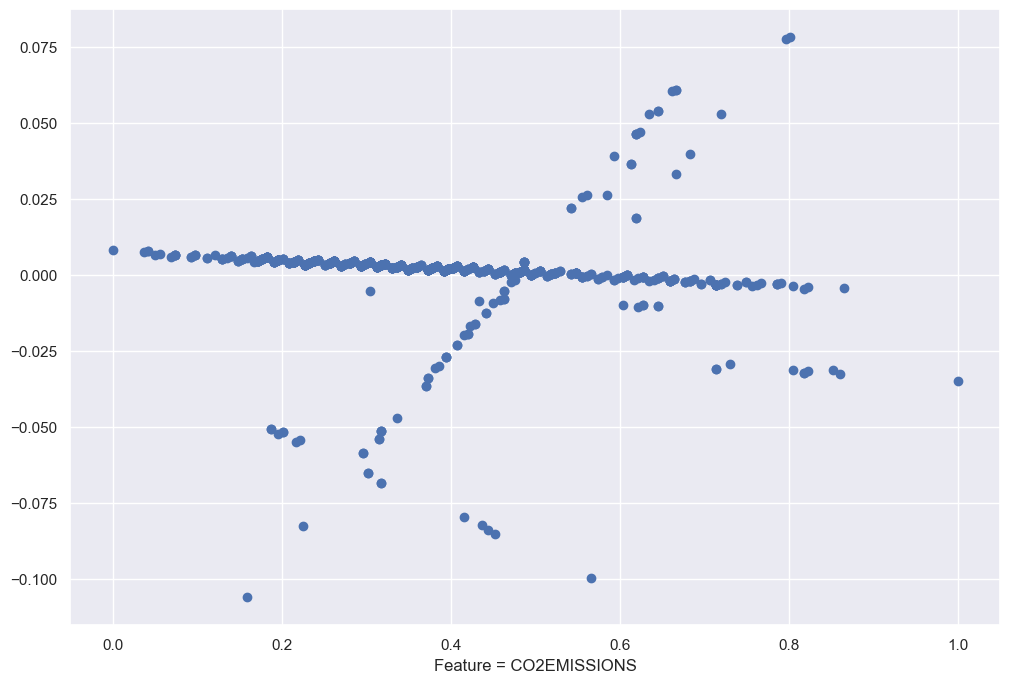

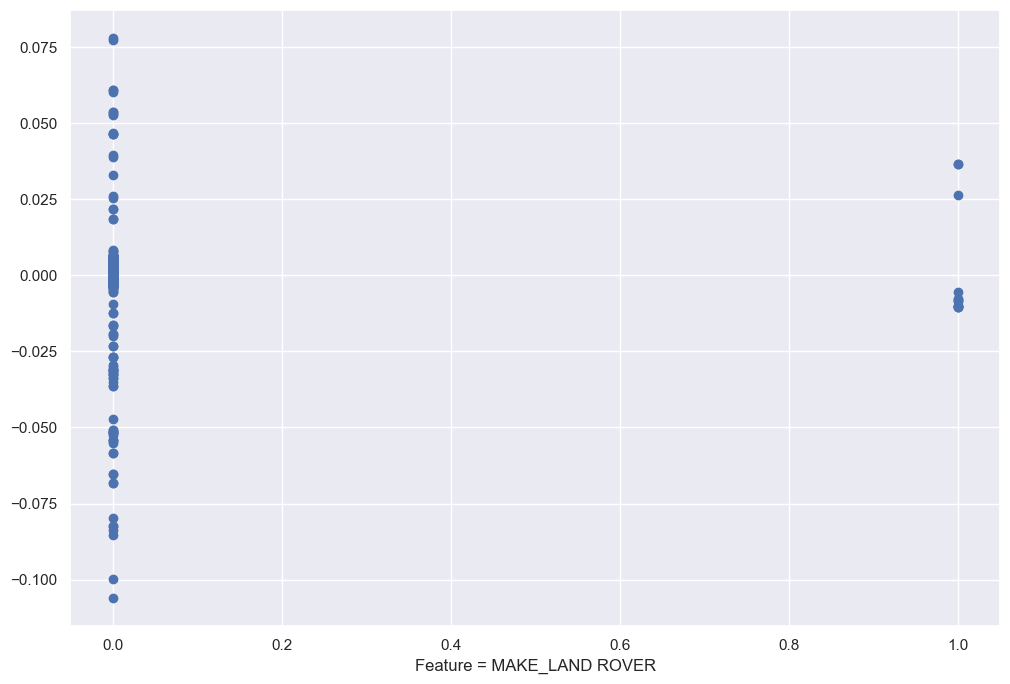

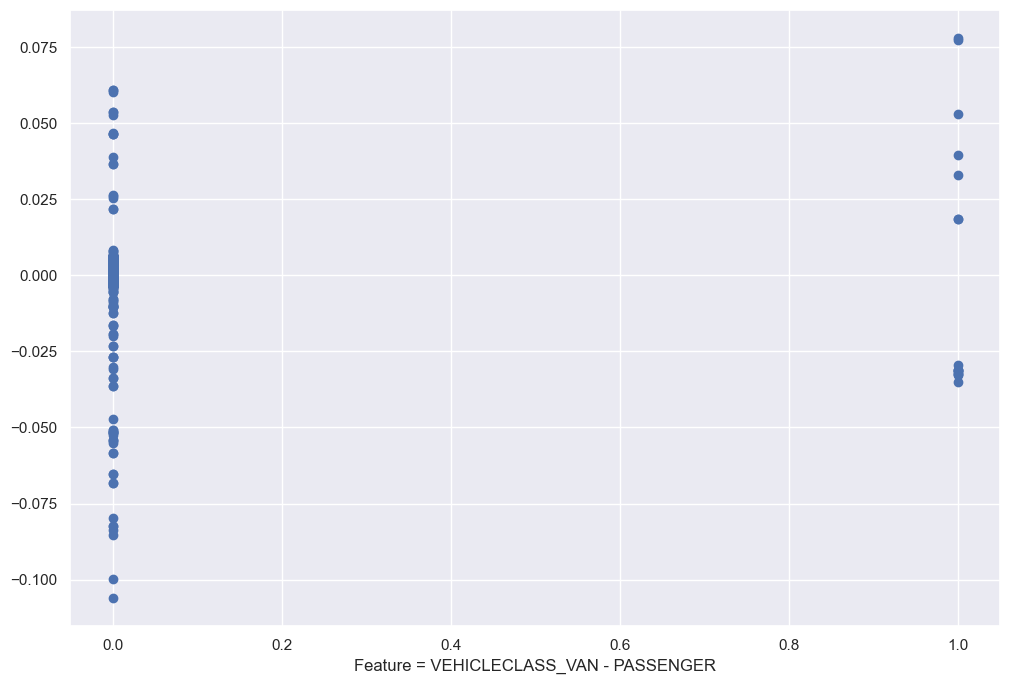

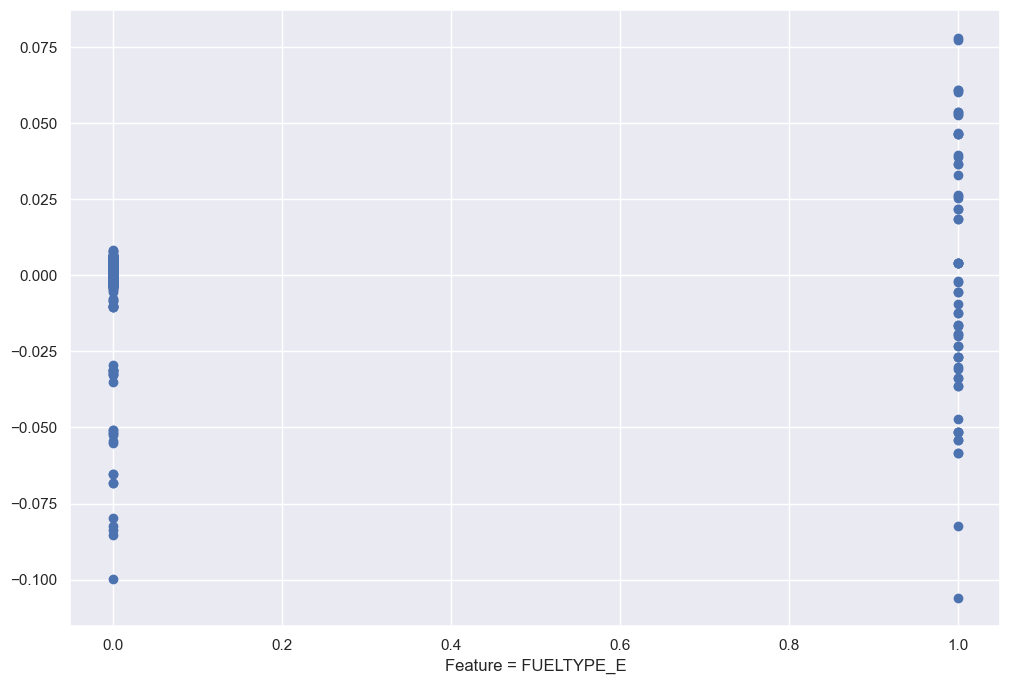

In [28]:
for i,x in enumerate(X_train_rfe.columns):
    plt.scatter(X_train_rfe.iloc[:,i],res)
    plt.xlabel('Feature = '+x)


    plt.show()

# 5. Making Predictions


In [29]:
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

In [30]:
y_test = df_test.pop('FUELCONSUMPTION_COMB')
X_test = df_test

In [31]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns[1:]]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [33]:
# Making predictions
y_pred = lm.predict(X_test_new)

## 6. Model Evaluation

Text(0, 0.5, 'y_pred')

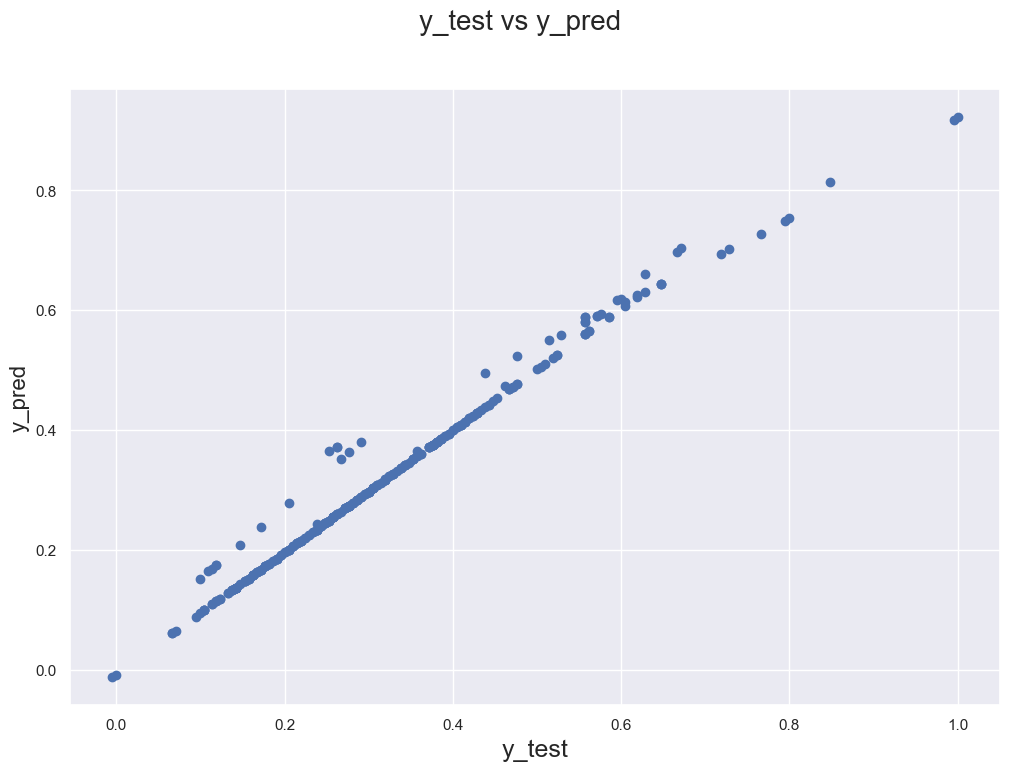

In [34]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9845698665200774